In [ ]:
# Obtén K clusters del conjunto Iris mediante el método de K-medias

In [ ]:
import os, sys
# cargar librerÌas-----------------------------------------------
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# cargar datos Iris----------------------------------------------
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
# capturar matriz de las variables de iris-----------------------
X = data.data

# nombres variables X
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# dimension de X
X.shape

(150, 4)

In [ ]:
# grupos reales (para comprobar que el clustering)--------------- 
y = data.target

In [ ]:
# definir ajuste Kmedias-----------------------------------------
kmedias_k = [KMeans(n_clusters = k, random_state = 3, 
n_init = 10).fit(X)
                for k in range(2, 11)]
inercias = [model.inertia_ for model in kmedias_k]

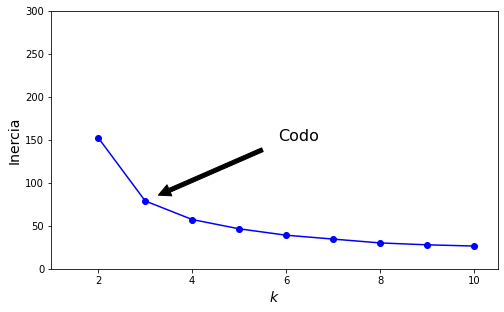

In [ ]:
# pintar inercias------------------------------------------------
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 11), inercias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(3, inercias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 10.5, 0, 300])
plt.show()

In [ ]:
# definir ajuste Kmedias con K = 3-------------------------------
kmedias_3 = KMeans(n_clusters = 3, 
random_state = 3, n_init = 10).fit(X)
# calcular prediccion--------------------------------------------
y_pred = kmedias_3.fit_predict(X)
# clases del clustering------------------------------------------
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# clases reales--------------------------------------------------
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Se observa que todas las flores de la clase 0 se clasifican correctamente,
# aunque para algunas de las flores de las clases 1 y 2 existen discrepancias
# entre los valores predichos mediante el clustering y los valores reales.
# Esto se debe a que estas 2 clases tienen longitudes y anchuras de pétalo
# y sépalo similares.